# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/var/folders/5y/mmb1n6bj6hs322nrn6mwfcbw0000gn/T/ipykernel_58787/2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [4]:
df.isna().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL                           491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
GRADES_PK_G                      173
GRADES_KG_G                       83
GRADES_4_G                        83
GRADES_8_G                        83
GRADES_12_G                       83
GRADES_1_8_G                     695
GRADES_9_12_G                    644
GRADES_ALL_G                      83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

In [5]:
df.count()

PRIMARY_KEY                     1715
STATE                           1715
YEAR                            1715
ENROLL                          1224
TOTAL_REVENUE                   1275
FEDERAL_REVENUE                 1275
STATE_REVENUE                   1275
LOCAL_REVENUE                   1275
TOTAL_EXPENDITURE               1275
INSTRUCTION_EXPENDITURE         1275
SUPPORT_SERVICES_EXPENDITURE    1275
OTHER_EXPENDITURE               1224
CAPITAL_OUTLAY_EXPENDITURE      1275
GRADES_PK_G                     1542
GRADES_KG_G                     1632
GRADES_4_G                      1632
GRADES_8_G                      1632
GRADES_12_G                     1632
GRADES_1_8_G                    1020
GRADES_9_12_G                   1071
GRADES_ALL_G                    1632
AVG_MATH_4_SCORE                 565
AVG_MATH_8_SCORE                 602
AVG_READING_4_SCORE              650
AVG_READING_8_SCORE              562
dtype: int64

In [8]:
df.dropna(subset='AVG_MATH_8_SCORE', inplace=True)

In [14]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [16]:
df['GRADES_ALL_G'].isna().sum()

74

In [18]:
df['GRADES_ALL_G'] = df['GRADES_ALL_G'].fillna(df['GRADES_PK_G'] + df['GRADES_1_8_G'] + df['GRADES_9_12_G'])

In [19]:
df['GRADES_ALL_G'].isna().sum()

74

In [20]:
df[df['GRADES_ALL_G'].isna()][['GRADES_PK_G', 'GRADES_1_8_G', 'GRADES_9_12_G', 'ENROLL']].notna().any()

GRADES_PK_G      False
GRADES_1_8_G     False
GRADES_9_12_G    False
ENROLL           False
dtype: bool

In [21]:
df[df['ENROLL'].isna()]['GRADES_ALL_G'].notna().sum()

131

In [22]:
((df["GRADES_ALL_G"] - df['ENROLL'])/df['GRADES_ALL_G']).describe()

count    397.000000
mean       0.025946
std        0.051301
min       -0.096404
25%        0.003988
50%        0.013523
75%        0.031392
max        0.450693
dtype: float64

In [23]:
df['GRADES_ALL_G'] = df['GRADES_ALL_G'].fillna(df['ENROLL'])

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 8 Math

How many years of data are logged in our dataset? 

In [26]:
df['YEAR'].max() - df['YEAR'].min()

29

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [27]:
df['STATE'].unique()

array(['ALABAMA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA', 'COLORADO',
       'CONNECTICUT', 'DELAWARE', 'DISTRICT_OF_COLUMBIA', 'FLORIDA',
       'GEORGIA', 'HAWAII', 'IDAHO', 'INDIANA', 'IOWA', 'KENTUCKY',
       'LOUISIANA', 'MAINE', 'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN',
       'MINNESOTA', 'MISSISSIPPI', 'MISSOURI', 'NEBRASKA',
       'NEW_HAMPSHIRE', 'NEW_JERSEY', 'NEW_MEXICO', 'NEW_YORK',
       'NORTH_CAROLINA', 'NORTH_DAKOTA', 'OHIO', 'OKLAHOMA',
       'PENNSYLVANIA', 'RHODE_ISLAND', 'SOUTH_CAROLINA', 'TENNESSEE',
       'TEXAS', 'UTAH', 'VIRGINIA', 'WEST_VIRGINIA', 'WISCONSIN',
       'WYOMING', 'ILLINOIS', 'KANSAS', 'MONTANA', 'NEVADA', 'OREGON',
       'VERMONT', 'ALASKA', 'SOUTH_DAKOTA', 'WASHINGTON', 'NATIONAL',
       'DODEA'], dtype=object)

In [29]:
df[df['STATE'] == 'MICHIGAN']['AVG_MATH_8_SCORE'].mean()

276.1666666666667

In [30]:
df[df['STATE'] == 'OHIO']['AVG_MATH_8_SCORE'].mean()

282.25

Find the average for your chosen test across all states in 2019

In [31]:
df[df['YEAR'] == 2019]['AVG_MATH_8_SCORE'].mean()

281.2641509433962

For each state, find a maximum value for your chosen test score

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [37]:
states = df.groupby('STATE')
states['AVG_MATH_8_SCORE'].max()

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [38]:
df['INS_SPENDING_PS'] = df['INSTRUCTION_EXPENDITURE'] / df['GRADES_ALL_G']
# Instructional spending per student could be useful

In [39]:
df['SUP_SPENDING_PS'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['GRADES_ALL_G']
# This is so I can compare the effects of instruction expenditure and support expenditure

In [40]:
df['PERCENT_EDUCATION_SPENDING'] = df['INSTRUCTION_EXPENDITURE'] / df['STATE_REVENUE']
# This shows the emphasis the state puts on education

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, 'Average Math Score')

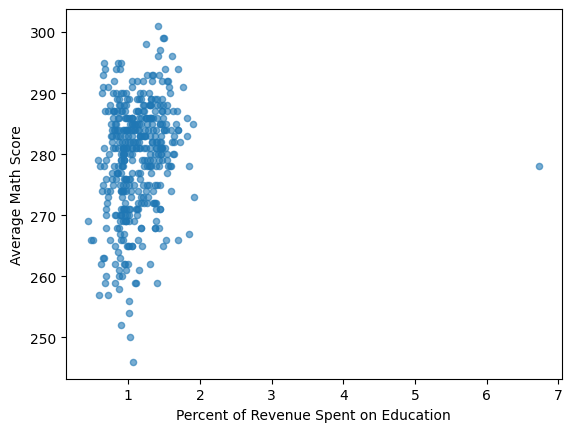

In [41]:
df.plot.scatter(x='PERCENT_EDUCATION_SPENDING', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('Percent of Revenue Spent on Education')
plt.ylabel('Average Math Score')

Minimal correlation between percent spending on education and scores

**Visualization 2**

Text(0, 0.5, 'Average Math Score')

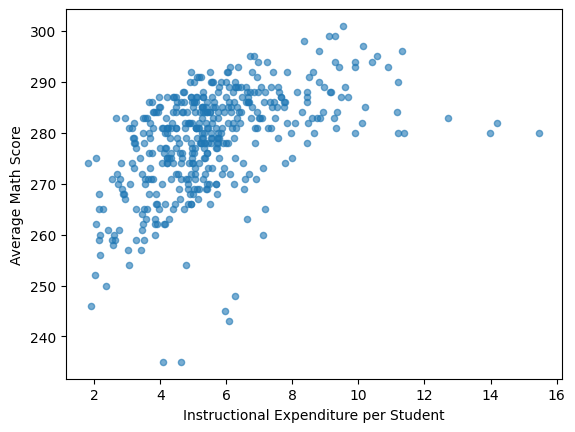

In [42]:
df.plot.scatter(x='INS_SPENDING_PS', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('Instructional Expenditure per Student')
plt.ylabel('Average Math Score')

Pretty strong positive correlation between instructional expenditure per student and scores

**Visualization 3**

Text(0, 0.5, 'Average Math Score')

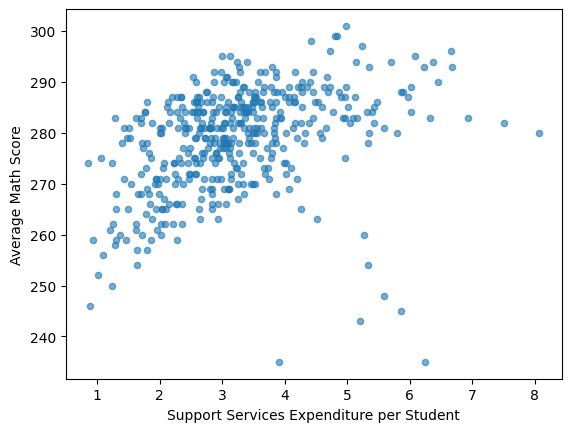

In [43]:
df.plot.scatter(x='SUP_SPENDING_PS', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('Support Services Expenditure per Student')
plt.ylabel('Average Math Score')

Also a fairly strong correlation between the two

**Visualization 4**

Text(0, 0.5, 'Average Score on Math 8 Exam')

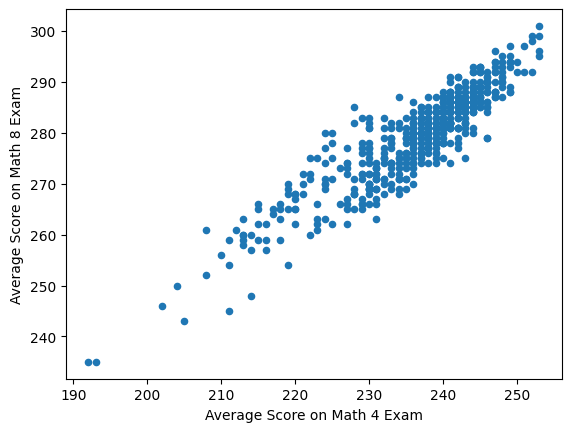

In [45]:
df.plot.scatter(x='AVG_MATH_4_SCORE', y='AVG_MATH_8_SCORE')
plt.xlabel('Average Score on Math 4 Exam')
plt.ylabel('Average Score on Math 8 Exam')

Very strong correlation

**Visualization 5**

Text(0, 0.5, 'Average Math Score')

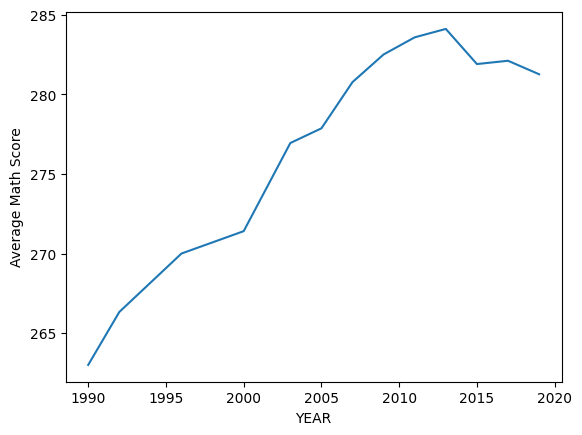

In [47]:
df.groupby(['YEAR'])['AVG_MATH_8_SCORE'].mean().plot()
plt.ylabel('Average Math Score')

Scores went up for the most part, before going back down in around 2013

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [48]:
from sklearn.model_selection import train_test_split

In [62]:
# X =
# y = 
X = df[['GRADES_8_G', 'INS_SPENDING_PS', 'SUP_SPENDING_PS', 'AVG_MATH_4_SCORE', 'AVG_READING_8_SCORE', 'YEAR']].dropna()

In [63]:
Y = df.loc[X.index]['AVG_MATH_8_SCORE']
Y.fillna(Y.median(), inplace=True)

In [64]:
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [65]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [66]:
# create your model here
# model = 
model = LinearRegression()

In [67]:
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [70]:
model.score(X_test, Y_test)

0.9090701973109616

In [71]:
np.mean(model.predict(X_test) - Y_test)

0.6123465262218033

In [73]:
np.mean(np.abs(model.predict(X_test)-Y_test))

1.9431359104713781

In [74]:
np.mean((model.predict(X_test) - Y_test)**2)**0.5

2.4245935413955895

In [78]:
np.mean(np.abs(model.predict(X_test)-Y_test)/Y_test)

0.00695546700912434

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

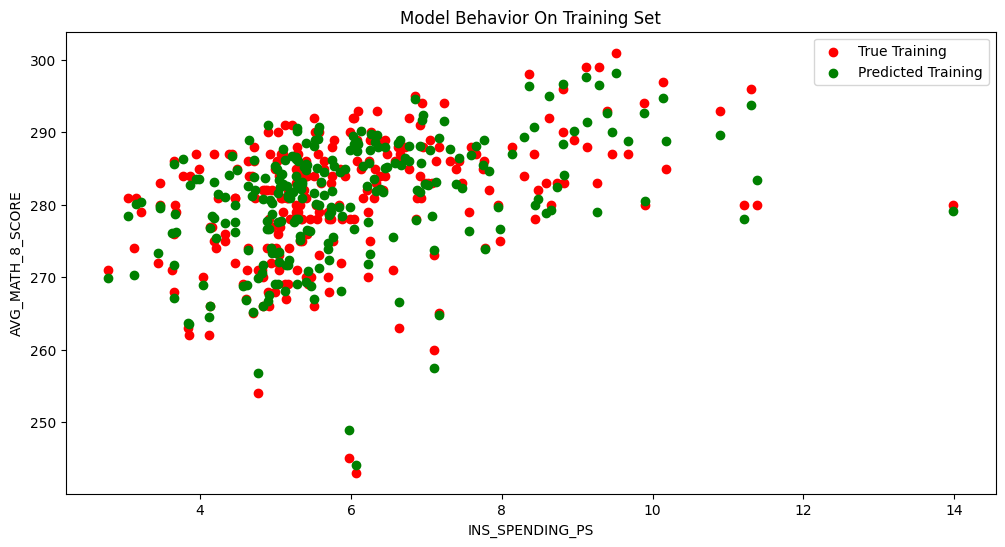

In [76]:
col_name = 'INS_SPENDING_PS'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], Y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

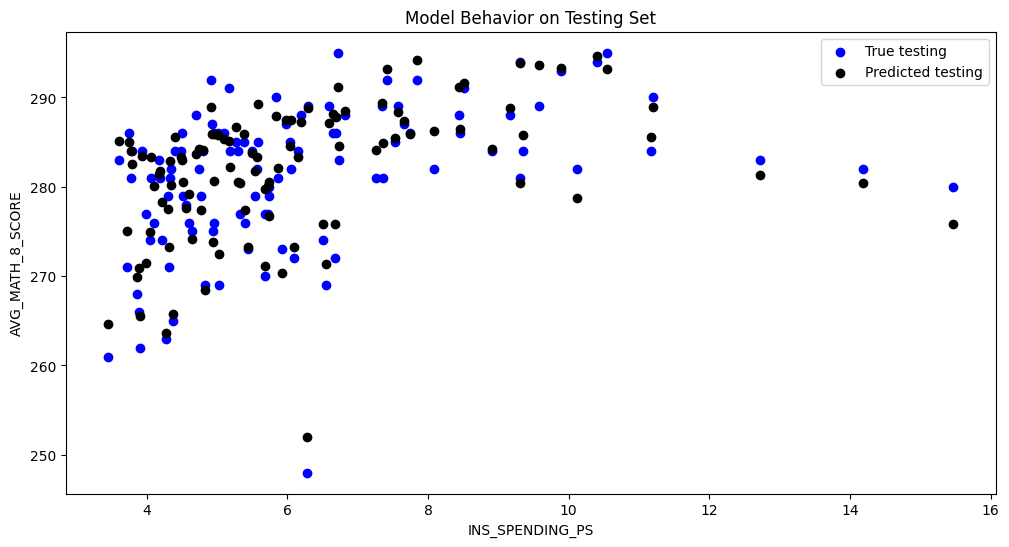

In [77]:
col_name = 'INS_SPENDING_PS'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], Y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**